# Graficos de geospatial

Vamos a probar realizar graficos geoespaciales , con algun ejemplo de ocmo realizarlo

Lo importante es que si o si debemos obtener archivos .geojson donde obtenemos informacion sobre la ubicacion. Aqui en estos casos vamos a trabajar con info ya armada o determinada

# instalacion de Geopandas

In [ ]:
!pip install geopandas
#!pip install geoplot

#Grafico de Argentina

En este tipo de grafico utilizando geopandas , vamos a grficar Argentina segun su departamentos y alli vamos a ubicar los puntos donde existen plantas de procesamiento de agua

In [ ]:
#importacion de librerias

import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Carga de datos geoespaciales de los departamentos de Argentina
df = gpd.read_file('/content/drive/MyDrive/departamento.json')
df.head()

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,2,Departamento,Departamento Federal,Departamento,Federal,30035,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57731 -30.69016, -58.57512..."
1,3,Departamento,Departamento Gualeguaychú,Departamento,Gualeguaychú,30056,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.13011 -33.02912, -58.13087..."
2,4,Departamento,Departamento Islas del Ibicuy,Departamento,Islas del Ibicuy,30063,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57589 -34.02675, -58.57593..."
3,5,Departamento,Departamento Victoria,Departamento,Victoria,30105,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-59.77158 -32.58791, -59.77198..."
4,6,Departamento,Departamento Diamante,Departamento,Diamante,30021,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-60.25784 -32.05170, -60.25723..."


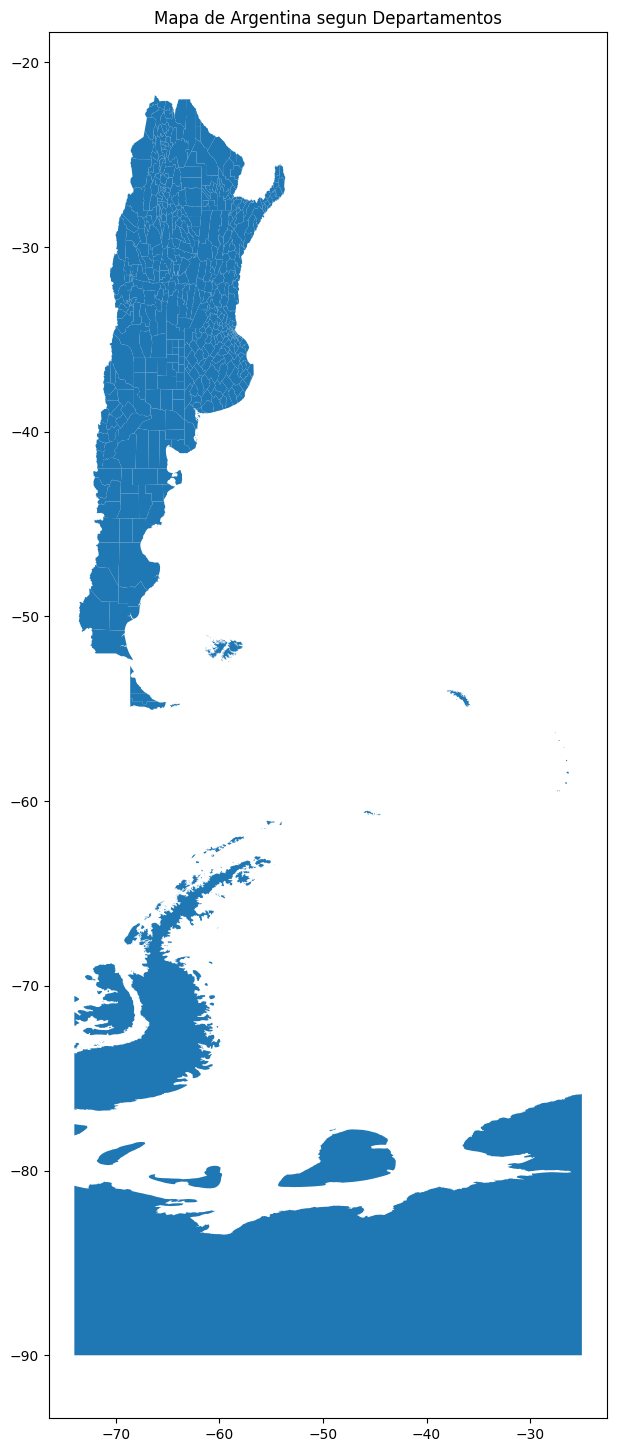

In [8]:
#genero lienzo
f = plt.figure(figsize=(20,18))
ax = f.add_subplot(1,1,1) #add subplot


#grafico vinculado al lienzo
df.plot(ax= ax)

ax.set_title('Mapa de Argentina segun Departamentos');


In [9]:
df[df['nam'] == 'Antártida Argentina']

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry
187,155,Departamento,Departamento Antártida Argentina,Departamento,Antártida Argentina,94028,SCAR,IGN,"MULTIPOLYGON (((-25.00000 -75.87687, -25.00000..."


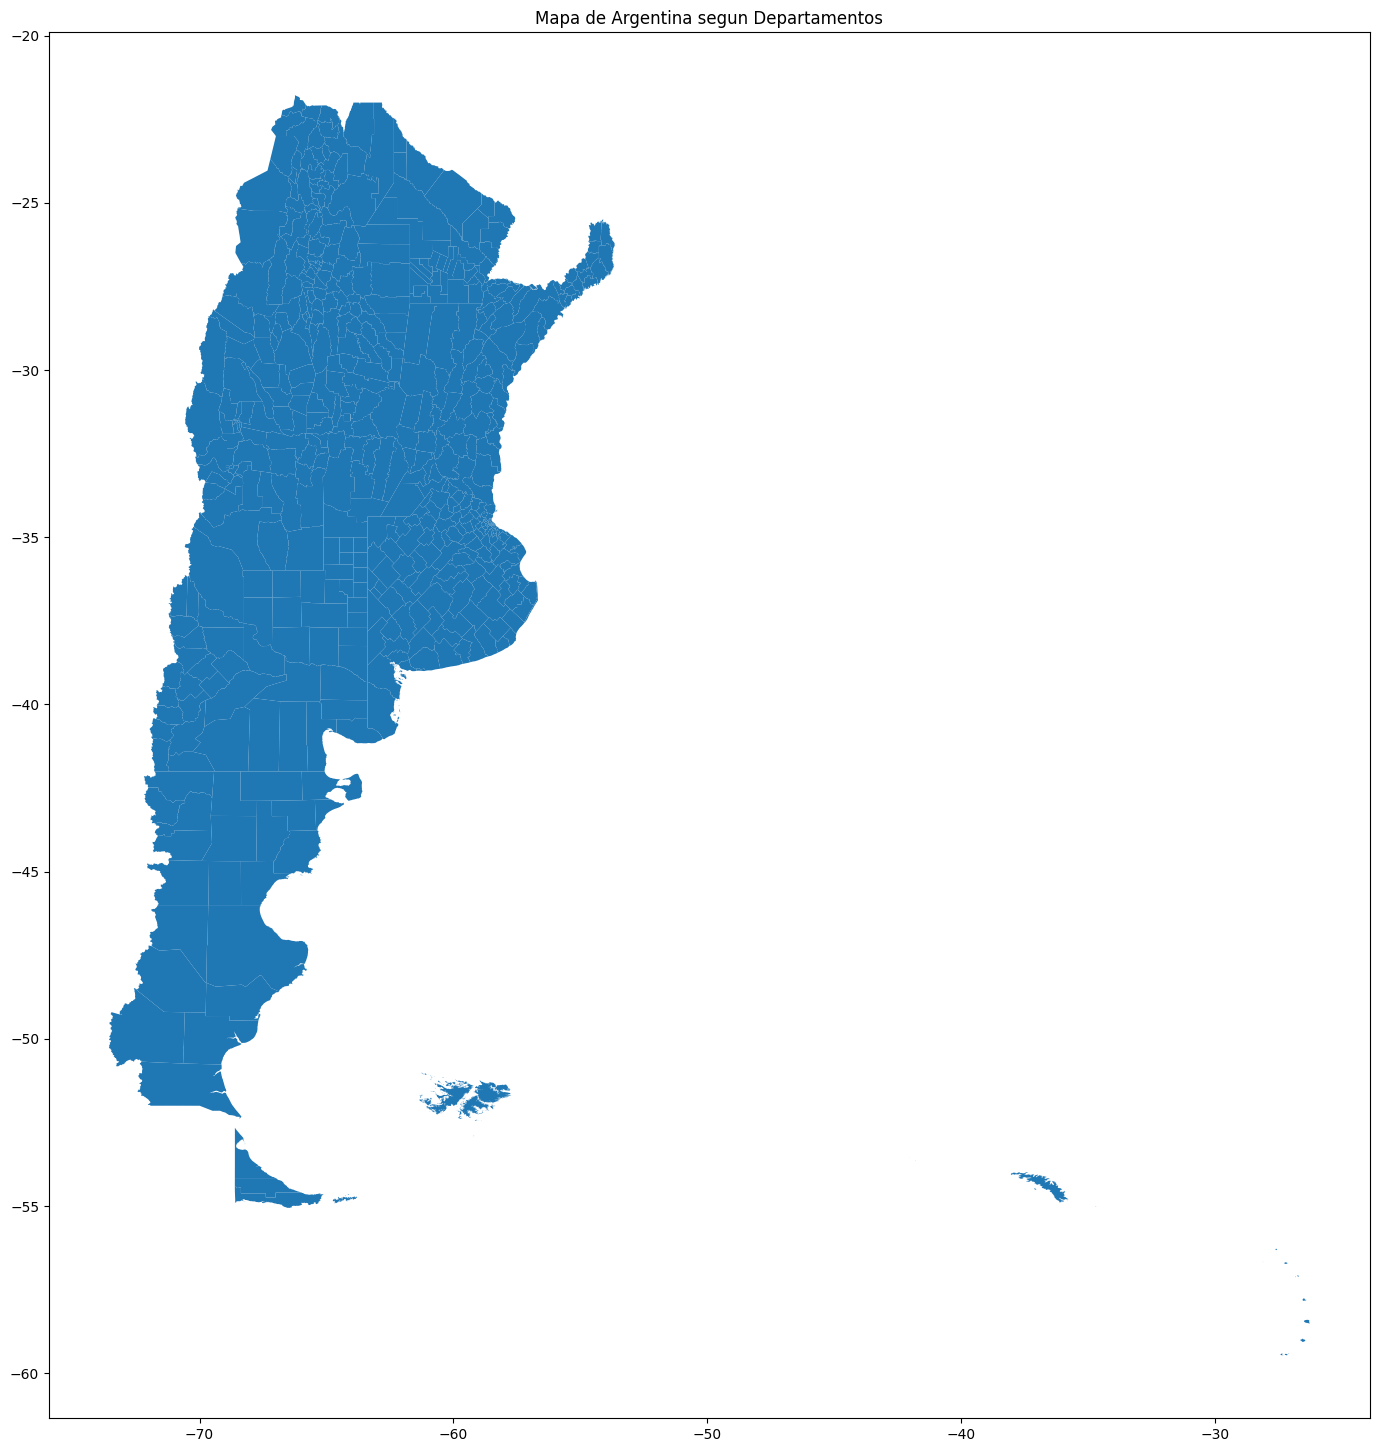

In [13]:
#genero lienzo
f = plt.figure(figsize=(20,18))
ax = f.add_subplot(1,1,1) #add subplot


df1 = df[df['nam'] != 'Antártida Argentina']
#grafico vinculado al lienzo
df1.plot(ax= ax)

ax.set_title('Mapa de Argentina segun Departamentos');

## Se busca informacion de los centros de potabilizacion de agua y su ubicacion

La idea es poder realizar la union entre los dos mapas

In [14]:
#carga de nuevo dataframe de potabilizacion de agua
pto_procesamiento = gpd.read_file('/content/drive/MyDrive/puntos_de_fabricacion_y_procesamiento_BH220 (2).json')


# se obtiene la proyeccion de los valores del mapra de argentina
gridcrs = df1.crs


In [12]:
pto_procesamiento.head()

,gid,entidad,objeto,fna,gna,nam,sag,fun,fdc,geometry
0,119,3,Planta potabilizadora de agua,None,None,None,IGN,6.0,IGN04/Dir. Geografía IGN,POINT (-69.29596 -39.52322)
1,127,3,Planta potabilizadora de agua,None,None,None,IGN,6.0,IGN01,POINT (-71.11019 -39.91616)
2,1040,3,Planta potabilizadora de agua,Planta Potabilizadora General Roca,Planta Potabilizadora,General Roca,IGN,6.0,IGN/Google Earth,POINT (-67.52935 -39.03964)
3,2067,3,Planta potabilizadora de agua,None,None,None,IGN,6.0,IGN01,POINT (-70.75926 -37.11657)
4,2154,3,Planta potabilizadora de agua,Planta Potabilizadora,Planta Potabilizadora,None,IGN,6.0,IGN04/Open Street View,POINT (-71.32752 -41.13902)


In [15]:
gridcrs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
pto_procesamiento['geometry']

0      POINT (-69.29596 -39.52322)
1      POINT (-71.11019 -39.91616)
2      POINT (-67.52935 -39.03964)
3      POINT (-70.75926 -37.11657)
4      POINT (-71.32752 -41.13902)
                  ...             
191    POINT (-65.70207 -28.35693)
192    POINT (-65.82097 -28.46989)
193    POINT (-69.25388 -51.61762)
194    POINT (-60.73993 -32.74794)
195    POINT (-61.17263 -33.03328)
Name: geometry, Length: 196, dtype: geometry

In [17]:
#se trasnforma las ubicaciones de los puntos de agua vinculando con las coordenadas de mapa de argentina
pto_procesamiento['geometry'] = pto_procesamiento['geometry'].to_crs(gridcrs)


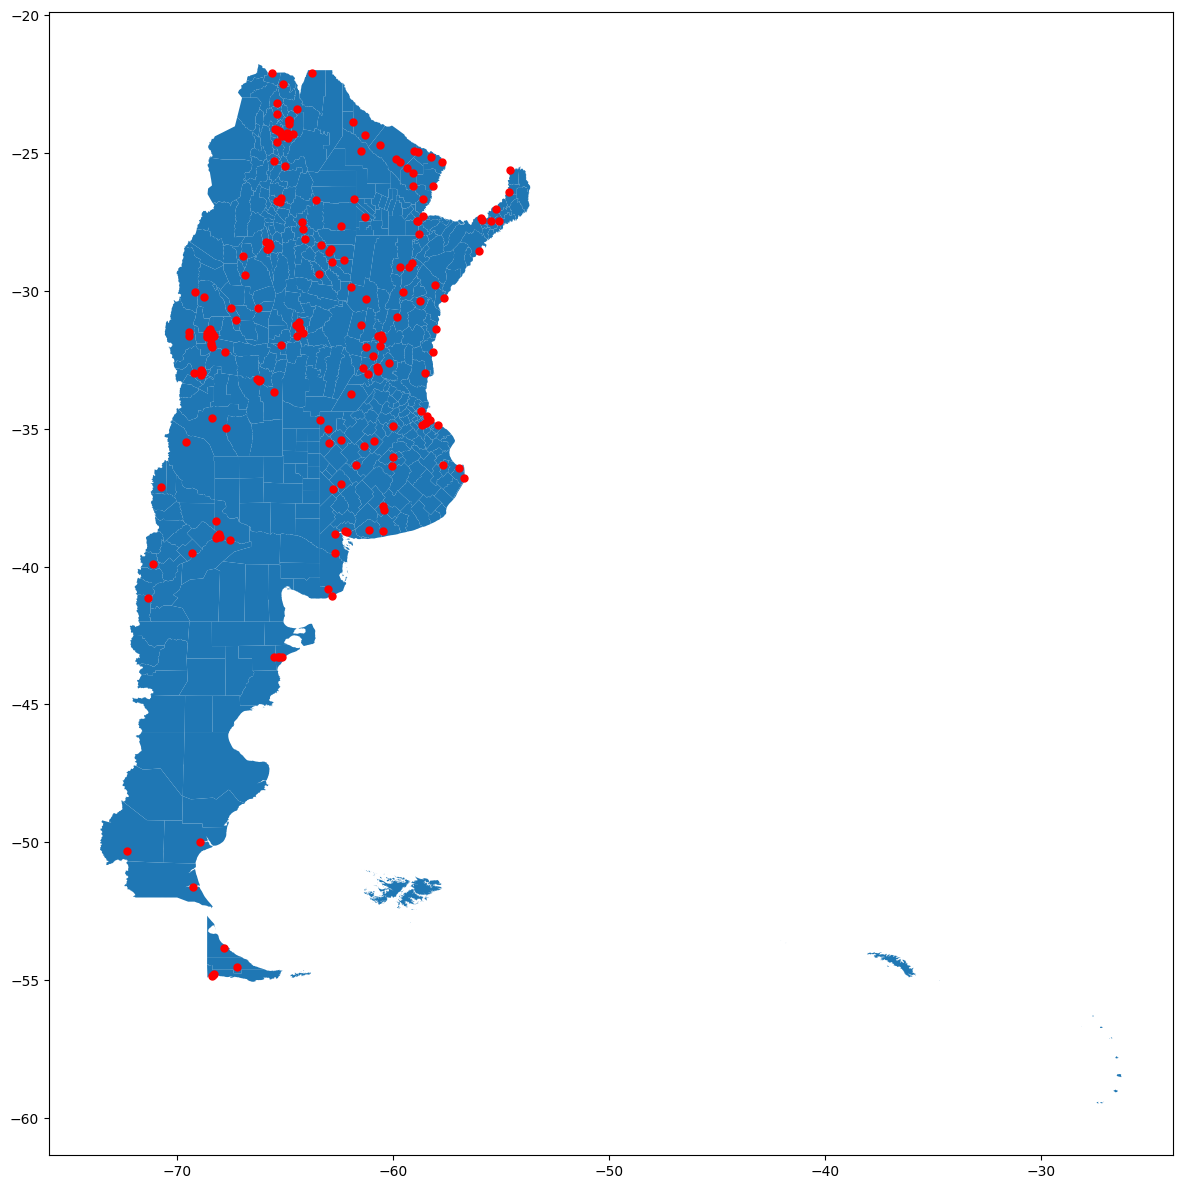

In [19]:
#grafico en conjunto
mapa = df1.plot(linewidth=0.03, figsize=(15,12))
pto_procesamiento.plot(ax=mapa, color='red', markersize=25)
plt.tight_layout()

# Otro ejemplo pero usando pandas y plotly

Aqui la idea es poder utilizar un csv donde directamente podamos graficar en plotly con tipo de graficos que trabajan con coordenadas

In [20]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')



In [21]:
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


## La librearia de plotly Choropleth ya tiene definido en base a los nombre de los paises su ubicacion , por lo cual es facil por localizar

In [23]:
#

fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'], # pandas series con los nombre de paises
    z = df['GDP (BILLIONS)'], # variable a graficar
    text = df['COUNTRY'], # texto que estara en la variable
    colorscale = 'Blues', # escala de color a diferencias
    reversescale=True, # escala reversa , es decir los mas oscuros seran los mas chicos
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP<br>Billions US$', # nombre de la legenda
))

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0}, # omitir margen del lienzo
    geo=dict(
        showframe=False,
        showcoastlines=False,
    ), # omite recuadro central del grafico
    annotations = [dict(
        x=0.55,
        y=0.1,

        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    ), # agrega un texto en base a ubicacion del lienzo
    dict(
        x=0.1,
        y=0.95,
        xref='paper',
        yref='paper',
        text='2014 Global GDP',
        showarrow = False
    )
    ]
)

fig.show()

#otro GRafico usando folium

Aqui ;a idea es utilizar una libreria llamada folium , vinculada a diferentes tipos de mapas

Vamos a obtener los asesinatos en Argentina y con ellos vincularlos en ciertos lugares especificos

In [24]:
import folium

In [40]:
#geneeracion de datos de los delitos
df_crimen = pd.read_csv('/content/drive/MyDrive/delitos_2021 (1).csv', sep=';').sample(500)

In [28]:
df_crimen.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
45750,RH-2021-1383393,2021,Agosto,Lunes,02/08/2021,19,Robo (con violencia),NaN,NaN,Nueva Pompeya,4.0,"-34,652502","-58,416037",NaN
64235,RH-2021-1546292,2021,Octubre,Domingo,31/10/2021,21,Robo (con violencia),NaN,NaN,Recoleta,2.0,"-34,599611","-58,395151",NaN
31381,RH-2021-1214051,2021,Mayo,Lunes,10/05/2021,19,Hurto (sin violencia),NaN,NaN,Parque Chacabuco,7.0,"-34,634536","-58,429898",NaN
66953,RH-2021-1569600,2021,Noviembre,Domingo,14/11/2021,SD,Robo (con violencia),NaN,NaN,Monserrat,1.0,"-34,609454","-58,386142",NaN
47770,RH-2021-1402303,2021,Agosto,Martes,10/08/2021,2,Robo (con violencia),NaN,Arma de fuego,Liniers,9.0,"-34,644237","-58,523093",NaN


In [29]:
df_crimen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 45750 to 60971
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id-mapa    500 non-null    object 
 1   anio       500 non-null    int64  
 2   mes        500 non-null    object 
 3   dia        500 non-null    object 
 4   fecha      500 non-null    object 
 5   franja     500 non-null    object 
 6   tipo       500 non-null    object 
 7   subtipo    104 non-null    object 
 8   uso_armas  44 non-null     object 
 9   barrio     495 non-null    object 
 10  comuna     496 non-null    float64
 11  latitud    500 non-null    object 
 12  longitud   500 non-null    object 
 13  cantidad   46 non-null     float64
dtypes: float64(2), int64(1), object(11)
memory usage: 58.6+ KB


In [32]:
df_crimen[df_crimen['latitud'] == 'SD']

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
441,LC-2021-1024473,2021,Enero,Domingo,17/01/2021,18,Lesiones,Siniestro Vial,NaN,NaN,0.0,SD,SD,1.0
83355,RH-2021-3101471,2021,Julio,Jueves,15/07/2021,14,Hurto (sin violencia),NaN,NaN,NaN,NaN,SD,SD,NaN
87626,RH-2021-3109662,2021,Noviembre,Martes,30/11/2021,10,Robo (con violencia),NaN,NaN,NaN,NaN,SD,SD,NaN
33507,RH-2021-1233947,2021,Mayo,Lunes,24/05/2021,6,Robo (con violencia),NaN,NaN,NaN,NaN,SD,SD,NaN
81088,RH-2021-3096968,2021,Abril,Miércoles,28/04/2021,SD,Robo (con violencia),NaN,Arma cortante,NaN,NaN,SD,SD,NaN


In [44]:
df_crimen = df_crimen[df_crimen['latitud'] != 'SD']
df_crimen.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
7312,RH-2021-1000178,2021,Enero,Viernes,01/01/2021,3,Hurto (sin violencia),NaN,NaN,Constitución,1.0,-34.627007,"-58,384357",NaN
65181,RH-2021-1554448,2021,Noviembre,Sábado,06/11/2021,20,Hurto (sin violencia),NaN,NaN,Balvanera,3.0,-34.609233,"-58,391962",NaN
67552,RH-2021-1574258,2021,Noviembre,Miércoles,17/11/2021,10,Robo (con violencia),NaN,Arma cortante,Villa Lugano,8.0,-34.674789,"-58,466394",NaN
58950,RH-2021-1500912,2021,Octubre,Viernes,08/10/2021,17,Robo (con violencia),NaN,NaN,Parque Chacabuco,7.0,-34.640992,"-58,444024",NaN
6163,LC-2021-1577417,2021,Noviembre,Jueves,18/11/2021,18,Lesiones,Siniestro Vial,NaN,Agronomía,15.0,-34.589308,"-58,494147",1.0


In [45]:
#transformacion de latitud y longitud a float
df_crimen['latitud'] = df_crimen['latitud'].apply(lambda row: row.replace(',', '.'))
df_crimen['new_latitud'] = df_crimen['latitud'].astype('float')

df_crimen['longitud'] = df_crimen['longitud'].apply(lambda row: row.replace(',', '.'))
df_crimen['new_longitud'] = df_crimen['longitud'].astype('float')

In [38]:
#generacion de mapa segun promedio de latitu y longitd de los datos,  con un cierto zoom
map = folium.Map(location=[df_crimen.new_latitud.mean(), df_crimen.new_longitud.mean()], zoom_start=14, control_scale=True)

# agregado de marcadores en la ubicacion exacta
for index, location_info in df_crimen.iterrows():
    folium.Marker([location_info["latitud"], location_info["longitud"]], popup=location_info["fecha"]+' '+location_info["tipo"]).add_to(map)

In [39]:
#visualizacion del mapa
map